In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
file_path = "https://colab.research.google.com/drive/1WdBlGYG0yc00wGo7uayX8iZMEOgkjafM?authuser=3#scrollTo=mCBgqQkz-4CT"


In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer,util
import torch
import matplotlib.pyplot as plt
import numpy as np


In [2]:
catalog_df = pd.read_csv("//content/drive/MyDrive/SHL_catalog.csv")
catalog_df

,Assessment Name,URL,Duration,Remote Testing Support,Adaptive/IRT,Test Type,Skills,Description
0,Account Manager Solution,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 49,Yes,No,C\nP\nA\nB,"Mid-Professional,",The Account Manager solution is an assessment ...
1,Administrative Professional - Short Form,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 36,Yes,No,A\nK\nP,"Entry-Level,",The Administrative Professional solution is fo...
2,Agency Manager Solution,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 51,Yes,No,A\nB\nP\nS,"Front Line Manager, Manager, Supervisor,",The Agency Manager solution is for mid-level s...
3,Apprentice + 8.0 Job Focused Assessment,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 30,Yes,No,B\nP,"General Population, Graduate, Entry-Level,",The Apprentice + 8.0 Job-Focused Assessment is...
4,Apprentice 8.0 Job Focused Assessment,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 20,Yes,No,B\nP,"Entry-Level, General Population, Graduate,",The Apprentice 8.0 Job-Focused Assessment is a...
...,...,...,...,...,...,...,...,...
689,Accounts Receivable Simulation (New),https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 8,Yes,No,S,"Entry-Level, Graduate, Mid-Professional, Pr...",Simulated data entry test that measures the ab...
690,ADO.NET (New),https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 10,Yes,No,K,"Mid-Professional, Professional Individual Con...",Multi-choice test that measures the knowledge ...
691,Motivation Questionnaire MQM5,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = Untim...,Yes,No,P,"Director, Entry-Level, Executive, Front Lin...","By understanding what motivates their staff, m..."
692,Occupational Personality Questionnaire OPQ32r,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = Untim...,Yes,No,P,"Professional Individual Contributor, Supervis...",The SHL Occupational Personality Questionnaire...


In [3]:
catalog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Assessment Name         694 non-null    object
 1   URL                     694 non-null    object
 2   Duration                666 non-null    object
 3   Remote Testing Support  694 non-null    object
 4   Adaptive/IRT            694 non-null    object
 5   Test Type               694 non-null    object
 6   Skills                  693 non-null    object
 7   Description             694 non-null    object
dtypes: object(8)
memory usage: 43.5+ KB


In [4]:
def combine_row(row):
    parts = [
        str(row["Assessment Name"]),
        str(row["Duration"]),
        str(row["Remote Testing Support"]),
        str(row["Adaptive/IRT"]),
        str(row["Test Type"]),
        str(row["Skills"]),
        str(row["Description"]),
    ]
    return ' '.join(parts)

In [5]:
catalog_df['combined'] = catalog_df.apply(combine_row,axis=1)

In [6]:
catalog_df

,Assessment Name,URL,Duration,Remote Testing Support,Adaptive/IRT,Test Type,Skills,Description,combined
0,Account Manager Solution,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 49,Yes,No,C\nP\nA\nB,"Mid-Professional,",The Account Manager solution is an assessment ...,Account Manager Solution Approximate Completio...
1,Administrative Professional - Short Form,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 36,Yes,No,A\nK\nP,"Entry-Level,",The Administrative Professional solution is fo...,Administrative Professional - Short Form Appro...
2,Agency Manager Solution,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 51,Yes,No,A\nB\nP\nS,"Front Line Manager, Manager, Supervisor,",The Agency Manager solution is for mid-level s...,Agency Manager Solution Approximate Completion...
3,Apprentice + 8.0 Job Focused Assessment,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 30,Yes,No,B\nP,"General Population, Graduate, Entry-Level,",The Apprentice + 8.0 Job-Focused Assessment is...,Apprentice + 8.0 Job Focused Assessment Approx...
4,Apprentice 8.0 Job Focused Assessment,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 20,Yes,No,B\nP,"Entry-Level, General Population, Graduate,",The Apprentice 8.0 Job-Focused Assessment is a...,Apprentice 8.0 Job Focused Assessment Approxim...
...,...,...,...,...,...,...,...,...,...
689,Accounts Receivable Simulation (New),https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 8,Yes,No,S,"Entry-Level, Graduate, Mid-Professional, Pr...",Simulated data entry test that measures the ab...,Accounts Receivable Simulation (New) Approxima...
690,ADO.NET (New),https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = 10,Yes,No,K,"Mid-Professional, Professional Individual Con...",Multi-choice test that measures the knowledge ...,ADO.NET (New) Approximate Completion Time in m...
691,Motivation Questionnaire MQM5,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = Untim...,Yes,No,P,"Director, Entry-Level, Executive, Front Lin...","By understanding what motivates their staff, m...",Motivation Questionnaire MQM5 Approximate Comp...
692,Occupational Personality Questionnaire OPQ32r,https://www.shl.com/products/product-catalog/v...,Approximate Completion Time in minutes = Untim...,Yes,No,P,"Professional Individual Contributor, Supervis...",The SHL Occupational Personality Questionnaire...,Occupational Personality Questionnaire OPQ32r ...


In [7]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
#converting each row into a vector/word embedding
corpus = catalog_df['combined'].tolist()
corpus_embeddings = model.encode(corpus,convert_to_tensor=True)

In [9]:
corpus_embeddings


tensor([[-0.0128,  0.0469,  0.0287,  ...,  0.0323, -0.0172, -0.0090],
        [-0.0300,  0.0064,  0.0582,  ..., -0.0265, -0.0368,  0.0233],
        [-0.0044, -0.0352, -0.0849,  ..., -0.0261, -0.0425,  0.0062],
        ...,
        [ 0.0355,  0.0182,  0.0257,  ..., -0.0116, -0.0775, -0.0030],
        [-0.0081,  0.0622,  0.0137,  ..., -0.0338,  0.0209, -0.0127],
        [ 0.0329,  0.0487,  0.0002,  ...,  0.0378, -0.0426, -0.0024]])

In [10]:
def print_assessments(user_query):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    query_embedding = model.encode(user_query, convert_to_tensor = True)
    cosine_scores = util.cos_sim(query_embedding,corpus_embeddings)[0]
    top_k = min(5,len(corpus))
    top_results = torch.topk(cosine_scores,k=top_k)
    print('Top 5 Matching Assessments:\n')
    results = []
    for score, idx in zip(top_results[0], top_results[1]):
        idx = idx.item()
        result = {
            "Assessment Name": catalog_df.iloc[idx]['Assessment Name'],
            "Skills": catalog_df.iloc[idx]['Skills'],
            "Test Type": catalog_df.iloc[idx]['Test Type'],
            "Description": catalog_df.iloc[idx]['Description'],
            "Remote Testing Support": catalog_df.iloc[idx]['Remote Testing Support'],
            "Adaptive/IRT": catalog_df.iloc[idx]['Adaptive/IRT'],
            "Duration": catalog_df.iloc[idx]['Duration'],
            "URL": catalog_df.iloc[idx]['URL'],
            "Score": round(score.item(), 4)
        }

        print(f"Assessment: {result['Assessment Name']}")
        print(f"Skills: {result['Skills']}")
        print(f"Test Type: {result['Test Type']}")
        print(f"Description: {result['Description']}")
        print(f"Remote Testing Support: {result['Remote Testing Support']}")
        print(f"Adaptive/IRT: {result['Adaptive/IRT']}")
        print(f"Duration: {result['Duration']} mins")
        print(f"URL: {result['URL']}")
        print(f"Score: {result['Score']}")
        print("-" * 50)

        results.append(result)
    return results

In [11]:
user_query = input("Enter your query:")
print("\n")
results = print_assessments(user_query)

Enter your query:Java


Top 5 Matching Assessments:

Assessment: Core Java (Advanced Level) (New)
Skills: Mid-Professional,  Professional Individual Contributor, 
Test Type: K
Description: Multi-choice test that measures the knowledge of basic Java constructs, OOP concepts, files and exception handling, and advanced Java concepts like generics, collections, threads, strings and concurrency.
Remote Testing Support: Yes
Adaptive/IRT: No
Duration: Approximate Completion Time in minutes = 13 mins
URL: https://www.shl.com/products/product-catalog/view/core-java-advanced-level-new/
Score: 0.53
--------------------------------------------------
Assessment: Core Java (Entry Level) (New)
Skills: Mid-Professional,  Professional Individual Contributor, 
Test Type: K
Description: Multi-choice test that measures the knowledge of basic Java constructs, OOP concepts, file handling, exception handling, threads, generic class and inner class.
Remote Testing Support: Yes
Adaptive/IRT: No
Duration: Appro

In [12]:
def compute_metrics(benchmark_queries,k=5):
    recall_scores = []
    average_precisions = []

    for entry in benchmark_queries:
        query = entry["query"]
        relevant_items = entry["relevant"]

        results = find_assessments(query)
        topk = [res["Assessment Name"] for res in results[:k]]

        #recall@k
        count = 0
        for item in topk:
            if item in relevant_items:
                count+=1
        recall_score = count/len(relevant_items)
        recall_scores.append(recall_score)

        #map@k
        ap = 0.0
        relevant_count = 0
        for i,res in enumerate(topk):
            if res in relevant_items:
                relevant_count+=1
                precision_at_k = relevant_count/(i+1)
                ap += precision_at_k
        ap = ap/min(k,len(relevant_items))
        average_precisions.append(ap)

    recall = sum(recall_scores)/len(recall_scores)
    map_ = sum(average_precisions)/len(average_precisions)

    print(f"Recall@{k}: {recall:.4f}")
    print(f"MAP@{k}: {map_:.4f}")

In [13]:
def find_assessments(user_query,k=5):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    query_embedding = model.encode(user_query, convert_to_tensor = True)
    cosine_scores = util.cos_sim(query_embedding,corpus_embeddings)[0]
    top_k = min(k,len(corpus))
    top_results = torch.topk(cosine_scores,k=top_k)
    results = []
    for score, idx in zip(top_results[0], top_results[1]):
        idx = idx.item()
        result = {
            "Assessment Name": catalog_df.iloc[idx]['Assessment Name'],
            "Skills": catalog_df.iloc[idx]['Skills'],
            "Test Type": catalog_df.iloc[idx]['Test Type'],
            "Description": catalog_df.iloc[idx]['Description'],
            "Remote Testing Support": catalog_df.iloc[idx]['Remote Testing Support'],
            "Adaptive/IRT": catalog_df.iloc[idx]['Adaptive/IRT'],
            "Duration": catalog_df.iloc[idx]['Duration'],
            "URL": catalog_df.iloc[idx]['URL'],
            "Score": round(score.item(), 4)
        }
        results.append(result)
    return results

In [18]:
benchmark_queries = [
    {
        "query": "I need an assessment for experienced .NET developers covering application development and diagnostics, can be finished in 30 minutes.",
        "relevant": [".NET Framework 4.5"]
    },
    {
        "query": "Suggest a quick screening test for candidates familiar with MVVM pattern and ViewModel communication.",
        "relevant": [".NET MVVM (New)"]
    },
    {
        "query": "Looking for a test on MVC architecture, routing and validation, under 20 minutes.",
        "relevant": [".NET MVC (New)"]
    },
    {
        "query": "Looking for a short assessment on XAML bindings and custom controls.",
        "relevant": [".NET XAML (New)"]
    },
    {
        "query": "Need a simulation test to evaluate payables and vendor invoice processing ability in under 10 minutes.",
        "relevant": ["Accounts Payable Simulation (New)"]
    },
    {
        "query": "What assessment would suit evaluating invoice handling and receivables knowledge for finance roles?",
        "relevant": ["Accounts Receivable (New)", "Accounts Payable (New)"]
    },
    {
        "query": "Which assessment checks fundamentals of WCF and service-oriented architecture?",
        "relevant": [".NET WCF (New)"]
    },
    {
        "query": "I want a test for evaluating WPF and XAML control skills in under 10 minutes.",
        "relevant": [".NET WPF (New)"]
    }
]


In [22]:
compute_metrics(benchmark_queries,k=8)

Recall@8: 4.6875
MAP@8: 4.6875


In [20]:
def compute_metrics_at_ks(benchmark_queries, ks=[1, 3, 5, 10]):
    recalls = []
    maps = []

    for k in ks:
        recall_scores = []
        average_precisions = []

        for entry in benchmark_queries:
            relevant_items = entry["relevant"]
            results = find_assessments(entry["query"])
            topk = [res["Assessment Name"] for res in results[:k]]

            # Recall@K
            matched = sum(1 for item in topk if item in relevant_items)
            recall = matched / len(relevant_items)
            recall_scores.append(recall)

            # MAP@K
            ap = 0.0
            relevant_count = 0
            for i, res in enumerate(topk):
                if res in relevant_items:
                    relevant_count += 1
                    ap += relevant_count / (i + 1)
            ap = ap / min(k, len(relevant_items))
            average_precisions.append(ap)

        recalls.append(sum(recall_scores) / len(recall_scores))
        maps.append(sum(average_precisions) / len(average_precisions))

    return ks, recalls, maps

In [23]:
def retrieve_top_k(query, k):
    # Return top-k dummy results, use actual model in practice
    dummy_catalog = [
        ".NET Framework 4.5",
        ".NET MVC (New)",
        ".NET MVVM (New)",
        ".NET WCF (New)",
        ".NET WPF (New)",
        ".NET XAML (New)",
        "Accounts Payable (New)",
        "Accounts Payable Simulation (New)",
        "Accounts Receivable (New)"
    ]
    return dummy_catalog[:k]


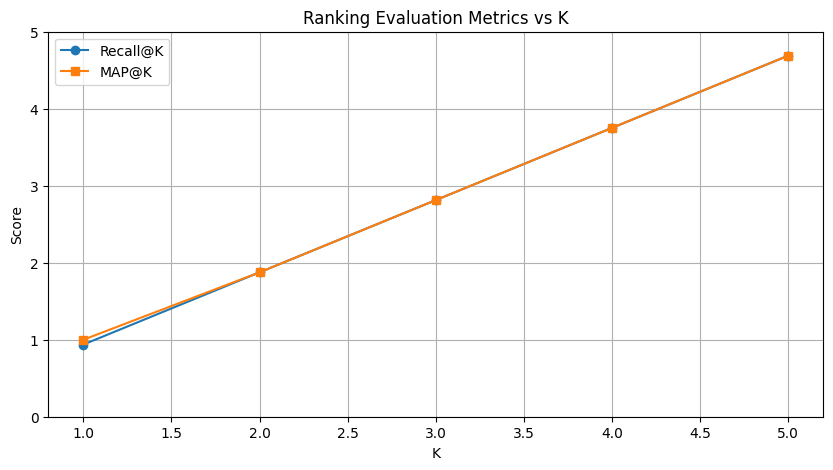

In [25]:
ks, recalls, maps = compute_metrics_at_ks(benchmark_queries, ks=[1, 2, 3, 4, 5])

plt.figure(figsize=(10, 5))
plt.plot(ks, recalls, label="Recall@K", marker='o')
plt.plot(ks, maps, label="MAP@K", marker='s')
plt.title("Ranking Evaluation Metrics vs K")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0, 5)
plt.grid(True)
plt.legend()
plt.show()